In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import warnings 

warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("E:\INTERNSHIP\Dataset MeriSKILL internship\Sales Data.csv")

In [13]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [14]:
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [15]:
df.shape

(185950, 11)

In [16]:
data=df

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [18]:
data.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [19]:
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [21]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
duplicates = data.duplicated().sum()  
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [22]:
# Convert 'Order Date' to datetime if necessary
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# EDA

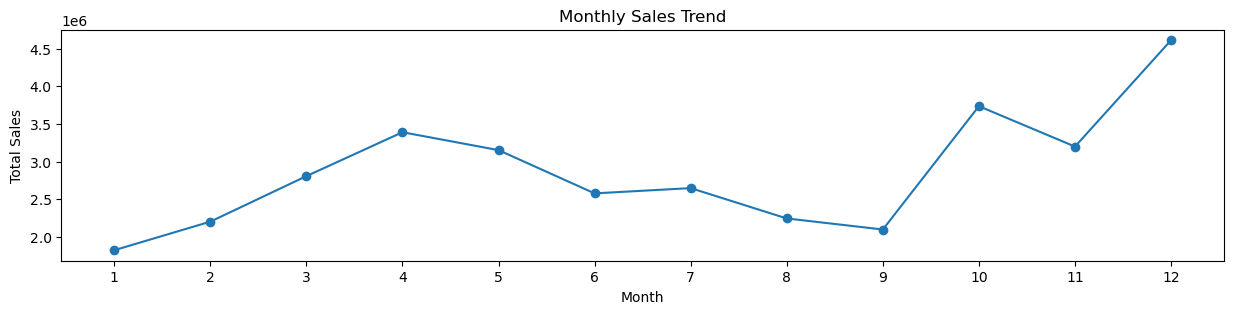

In [27]:
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.subplots(figsize=(15, 3))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.show()


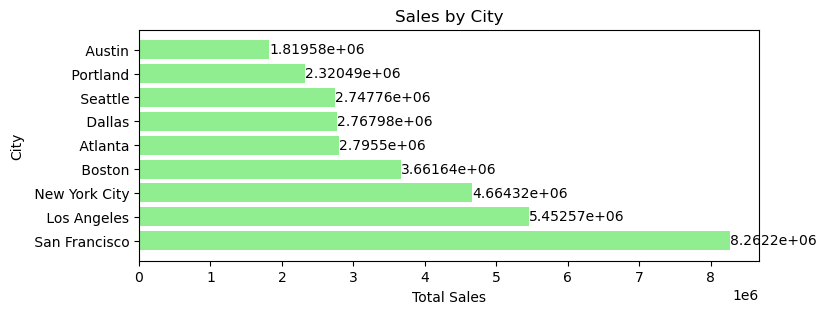

In [30]:
# Top Cities by Sales Plot
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.barh(city_sales.index, city_sales.values, color='lightgreen')
ax.set_title('Sales by City')
ax.set_xlabel('Total Sales')
ax.set_ylabel('City')
ax.bar_label(bars)  # Adding labels to the bars
plt.show()

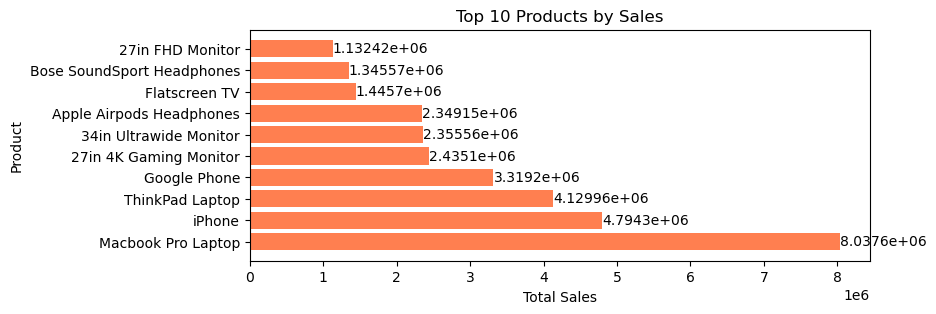

In [32]:
# Top-Selling Products Plot
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.barh(product_sales.index[:10], product_sales.values[:10], color='coral')
ax.set_title('Top 10 Products by Sales')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Product')
ax.bar_label(bars)  # Adding labels to the bars
plt.show()

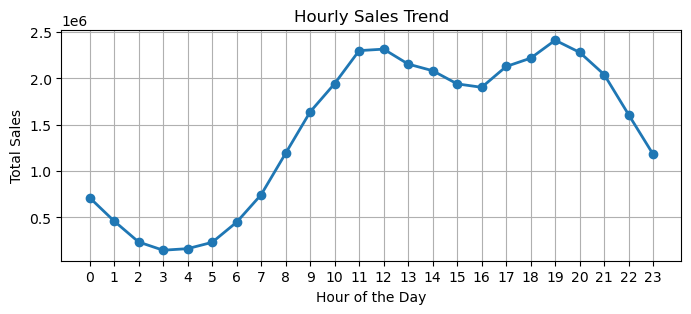

In [64]:
# Hourly Sales Line Plot
hourly_sales = df.groupby('Hour')['Sales'].sum()
fig, ax = plt.subplots(figsize=(8, 3))  # Create the figure and axis
ax.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', linewidth=2)  # Line plot
ax.set_title('Hourly Sales Trend')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Sales')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.show()


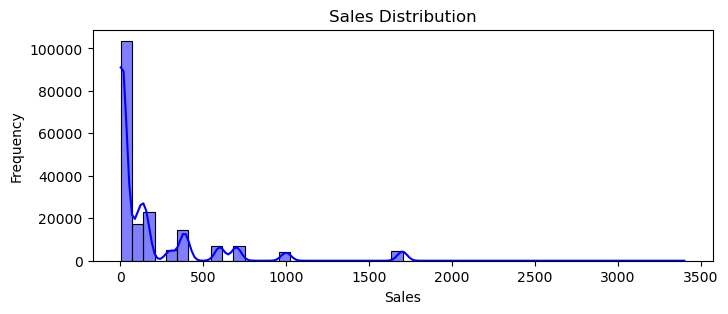

In [37]:
# Sales Distribution (Histogram)
plt.figure(figsize=(8, 3     ))
sns.histplot(df['Sales'], kde=True, color='blue', bins=50)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


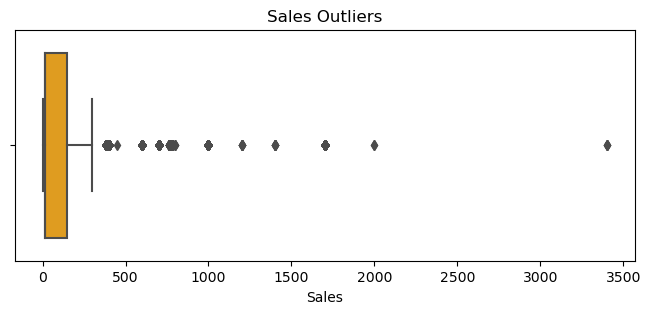

In [39]:
# Boxplot for Sales Outliers
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Sales'], color='orange')
plt.title('Sales Outliers')
plt.xlabel('Sales')
plt.show()


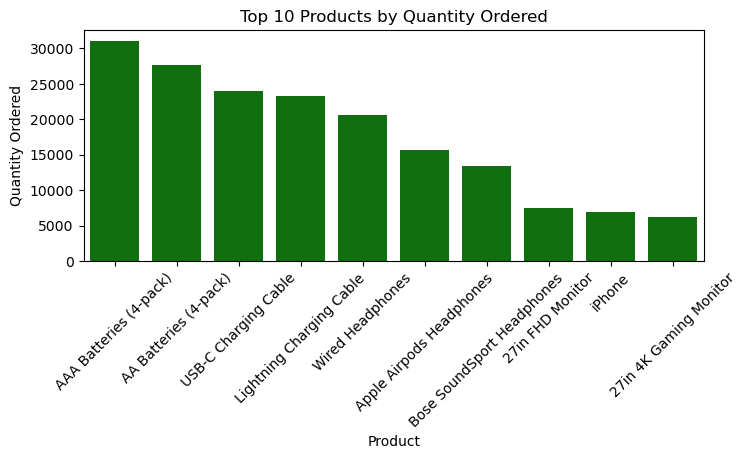

In [43]:
# Product Quantity Ordered Distribution
plt.figure(figsize=(8, 3))
product_quantity = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
sns.barplot(x=product_quantity.index[:10], y=product_quantity.values[:10], color='green')
plt.title('Top 10 Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()


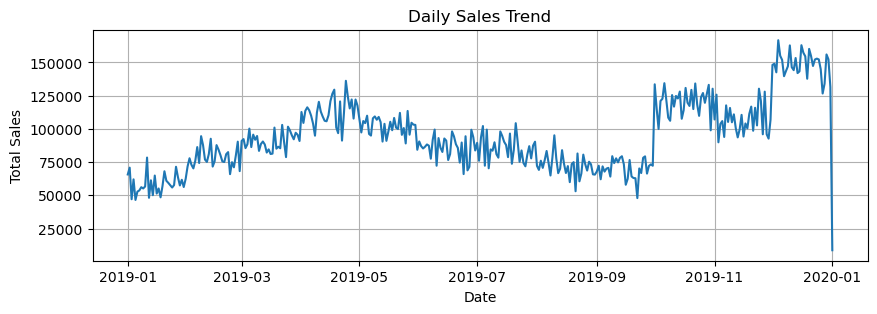

In [46]:
# Daily Sales Trend
daily_sales = df.groupby(df['Order Date'].dt.date)['Sales'].sum()
plt.figure(figsize=(10, 3))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


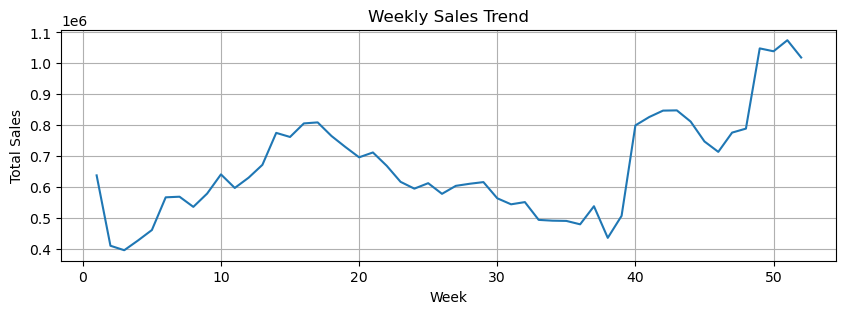

In [47]:
# Weekly Sales Trend
df['Week'] = df['Order Date'].dt.isocalendar().week
weekly_sales = df.groupby('Week')['Sales'].sum()
plt.figure(figsize=(10, 3))
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


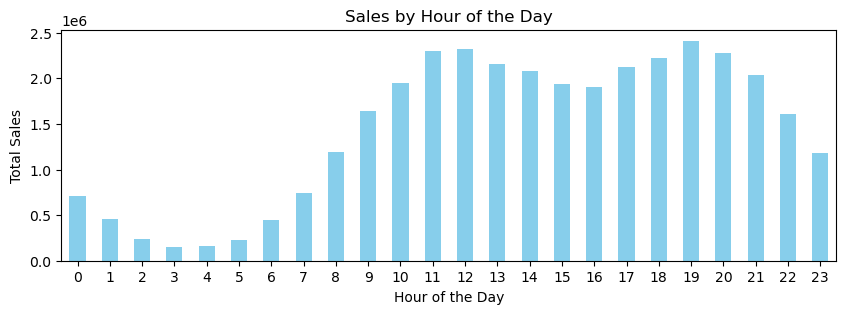

In [49]:
# Sales by Hour of the Day
hourly_sales = df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(10, 3))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


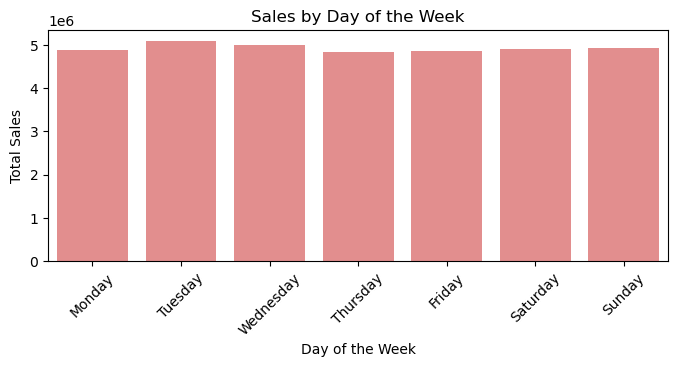

In [50]:
# Sales by Day of the Week
df['Day of Week'] = df['Order Date'].dt.day_name()
day_of_week_sales = df.groupby('Day of Week')['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8, 3))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values, color='lightcoral')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


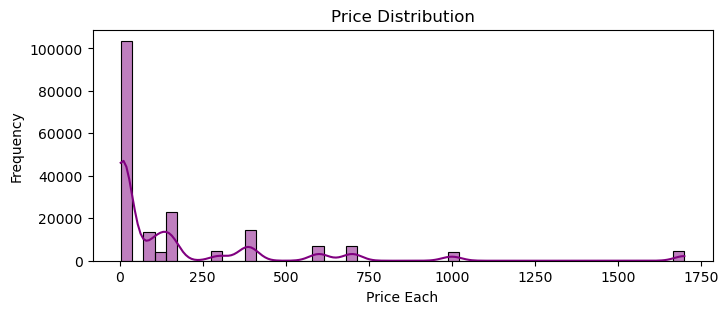

In [65]:
# Price Distribution
plt.figure(figsize=(8, 3))
sns.histplot(df['Price Each'], kde=True, color='purple', bins=50)
plt.title('Price Distribution')
plt.xlabel('Price Each')
plt.ylabel('Frequency')
plt.show()


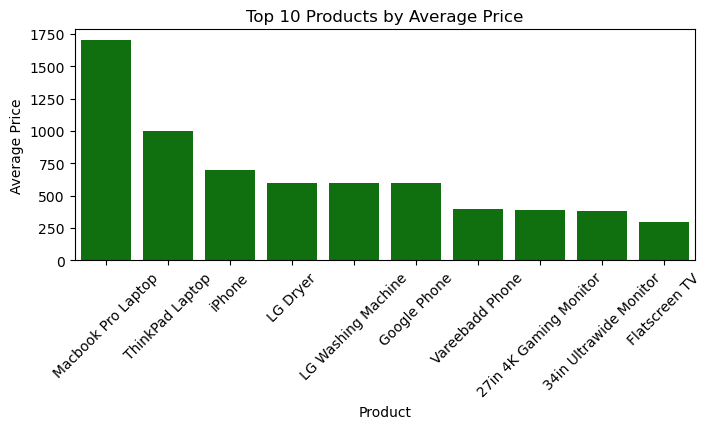

In [53]:
# Average Price Per Product
avg_price_per_product = df.groupby('Product')['Price Each'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 3))
sns.barplot(x=avg_price_per_product.index[:10], y=avg_price_per_product.values[:10], color='green')
plt.title('Top 10 Products by Average Price')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


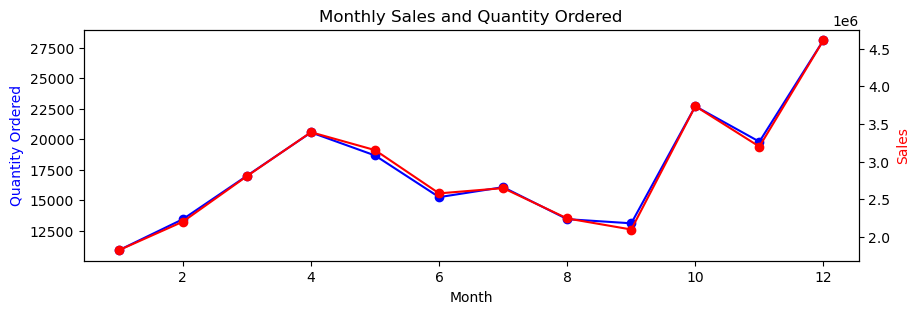

In [55]:
# Monthly Sales vs. Quantity Ordered
monthly_quantity = df.groupby('Month')['Quantity Ordered'].sum()
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(monthly_quantity.index, monthly_quantity.values, label='Quantity Ordered', color='blue', marker='o')
ax.set_ylabel('Quantity Ordered', color='blue')
ax.set_xlabel('Month')
ax2 = ax.twinx()
ax2.plot(monthly_sales.index, monthly_sales.values, label='Sales', color='red', marker='o')
ax2.set_ylabel('Sales', color='red')
plt.title('Monthly Sales and Quantity Ordered')
plt.show()


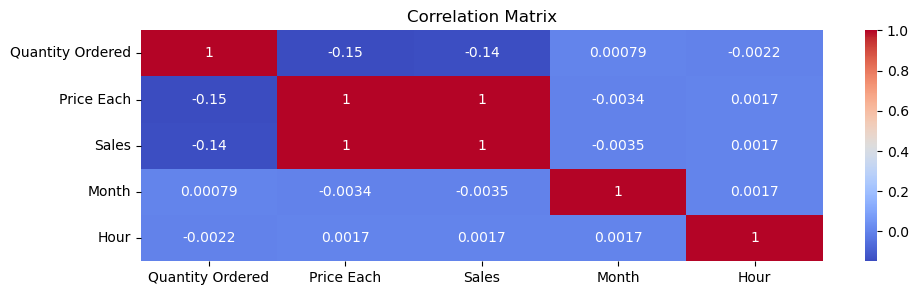

In [58]:
# Correlation Matrix
plt.figure(figsize=(11, 3))
sns.heatmap(df[['Quantity Ordered', 'Price Each', 'Sales', 'Month', 'Hour']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


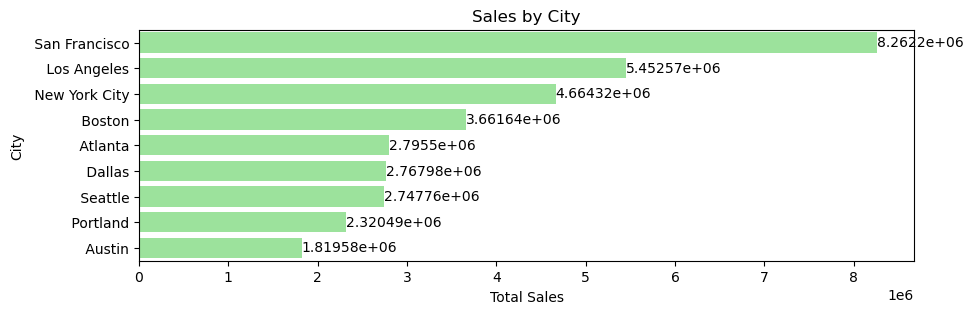

In [61]:
# Sales by City
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 3))
ax=sns.barplot(x=city_sales.values, y=city_sales.index, color='lightgreen')
plt.title('Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')


for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
